#### IGNORE WARNING

In [2]:
from warnings import filterwarnings

filterwarnings("ignore",category=DeprecationWarning)
filterwarnings("ignore",category=FutureWarning)
filterwarnings("ignore",category=UserWarning)

#### LIBRARY

In [37]:
from netCDF4 import Dataset
import matplotlib.pyplot as plt
import cartopy as ccr
import cartopy.crs as ccrs

#### STYLE

In [4]:
plt.style.use("dark_background")

## READING PROCESS

#### PATH

In [5]:
YEAR2018 = "../input/soil-temperature-from-2018-to-2022-nasa/soil_temperatures_PROJECT_I/YEAR_2018/inst1_2d_smp_Nx-202206261653output.1313.webform.nc4"
YEAR2019 = "../input/soil-temperature-from-2018-to-2022-nasa/soil_temperatures_PROJECT_I/YEAR_2019/inst1_2d_smp_Nx-202206261655output.3381.webform.nc4"
YEAR2020 = "../input/soil-temperature-from-2018-to-2022-nasa/soil_temperatures_PROJECT_I/YEAR_2020/inst1_2d_smp_Nx-202206261656output.5603.webform.nc4"
YEAR2021 = "../input/soil-temperature-from-2018-to-2022-nasa/soil_temperatures_PROJECT_I/YEAR_2021/inst1_2d_smp_Nx-202206261739output.23337.webform.nc4"
YEAR2022 = "../input/soil-temperature-from-2018-to-2022-nasa/soil_temperatures_PROJECT_I/YEAR_2022/inst1_2d_smp_Nx-202206261702output.12903.webform.nc4"

#### DATASET

In [6]:
nc2018 = Dataset(YEAR2018)
nc2019 = Dataset(YEAR2019)
nc2020 = Dataset(YEAR2020)
nc2021 = Dataset(YEAR2021)
nc2022 = Dataset(YEAR2022)

#### CONTROL

- WE'LL USE ONLY ONE FILE TO CHECK PARAMETERS

In [7]:
nc2018

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4 data model, file format HDF5):
    Conventions: COARDS
    calendar: standard
    comments: File
    model: geos/das
    center: gsfc
    dimensions(sizes): time(24), longitude(1152), latitude(721)
    variables(dimensions): float64 time(time), float64 longitude(longitude), float64 latitude(latitude), float32 tsoil4(time, latitude, longitude), float32 tsoil2(time, latitude, longitude), float32 tsoil1(time, latitude, longitude), float32 tsoil3(time, latitude, longitude)
    groups: 

In [15]:
nc2018.data_model

'NETCDF4'

In [12]:
nc2018.variables

{'time': <class 'netCDF4._netCDF4.Variable'>
 float64 time(time)
     units: hours since 2018-6-1 0
 unlimited dimensions: time
 current shape = (24,)
 filling on, default _FillValue of 9.969209968386869e+36 used,
 'longitude': <class 'netCDF4._netCDF4.Variable'>
 float64 longitude(longitude)
     units: degrees_east
     long_name: Longitude
 unlimited dimensions: 
 current shape = (1152,)
 filling on, default _FillValue of 9.969209968386869e+36 used,
 'latitude': <class 'netCDF4._netCDF4.Variable'>
 float64 latitude(latitude)
     units: degrees_north
     long_name: Latitude
 unlimited dimensions: 
 current shape = (721,)
 filling on, default _FillValue of 9.969209968386869e+36 used,
 'tsoil4': <class 'netCDF4._netCDF4.Variable'>
 float32 tsoil4(time, latitude, longitude)
     comments: Unknown1 variable comment
     long_name: soil_temperatures_layer_4
     units: 
     grid_name: grid01
     grid_type: linear
     level_description: Earth surface
     time_statistic: instantaneous

In [16]:
nc2018.dimensions

{'time': <class 'netCDF4._netCDF4.Dimension'> (unlimited): name = 'time', size = 24,
 'longitude': <class 'netCDF4._netCDF4.Dimension'>: name = 'longitude', size = 1152,
 'latitude': <class 'netCDF4._netCDF4.Dimension'>: name = 'latitude', size = 721}

In [17]:
nc2018.variables.keys()

dict_keys(['time', 'longitude', 'latitude', 'tsoil4', 'tsoil2', 'tsoil1', 'tsoil3'])

In [30]:
nc2018.variables["tsoil4"]

<class 'netCDF4._netCDF4.Variable'>
float32 tsoil4(time, latitude, longitude)
    comments: Unknown1 variable comment
    long_name: soil_temperatures_layer_4
    units: 
    grid_name: grid01
    grid_type: linear
    level_description: Earth surface
    time_statistic: instantaneous
    missing_value: 1000000000000000.0
unlimited dimensions: time
current shape = (24, 721, 1152)
filling on, default _FillValue of 9.969209968386869e+36 used

In [19]:
nc2018.variables["tsoil4"].datatype

dtype('float32')

In [20]:
nc2018.variables["tsoil4"].dimensions

('time', 'latitude', 'longitude')

In [21]:
nc2018.variables["tsoil4"].name

'tsoil4'

In [22]:
nc2018.variables["tsoil4"].long_name

'soil_temperatures_layer_4'

In [23]:
nc2018.variables["tsoil4"].mask

True

In [24]:
nc2018.variables["tsoil4"].missing_value

1000000000000000.0

In [25]:
nc2018.variables["tsoil4"].level_description

'Earth surface'

In [26]:
nc2018.variables["tsoil4"].time_statistic

'instantaneous'

In [27]:
nc2018.variables["tsoil4"].grid_name

'grid01'

In [28]:
nc2018.variables["tsoil4"].grid_type

'linear'

In [29]:
nc2018.variables["tsoil4"].ndim

3

In [31]:
nc2018.variables["tsoil4"].shape

(24, 721, 1152)

## SETTING AND SEPARING DATA

#### LATITUDE-LONGITUDE-TIME

In [32]:
LAT2018 = nc2018.variables["latitude"][:]
LON2018 = nc2018.variables["longitude"][:]
TIME2018 = nc2018.variables["time"][:]
#
LAT2019 = nc2019.variables["latitude"][:]
LON2019 = nc2019.variables["longitude"][:]
TIME2019 = nc2019.variables["time"][:]
#
LAT2020 = nc2020.variables["latitude"][:]
LON2020 = nc2020.variables["longitude"][:]
TIME2020 = nc2020.variables["time"][:]
#
LAT2021 = nc2021.variables["latitude"][:]
LON2021 = nc2021.variables["longitude"][:]
TIME2021 = nc2021.variables["time"][:]
#
LAT2022 = nc2022.variables["latitude"][:]
LON2022 = nc2022.variables["longitude"][:]
TIME2022 = nc2022.variables["time"][:]

#### SOIL LAYER - I

In [33]:
L12018 = nc2018.variables["tsoil1"][0,:,:]
L12019 = nc2019.variables["tsoil1"][0,:,:]
L12020 = nc2020.variables["tsoil1"][0,:,:]
L12021 = nc2021.variables["tsoil1"][0,:,:]
L12022 = nc2022.variables["tsoil1"][0,:,:]

#### SOIL LAYER - II

In [34]:
L22018 = nc2018.variables["tsoil2"][0,:,:]
L22019 = nc2019.variables["tsoil2"][0,:,:]
L22020 = nc2020.variables["tsoil2"][0,:,:]
L22021 = nc2021.variables["tsoil2"][0,:,:]
L22022 = nc2022.variables["tsoil2"][0,:,:]

#### SOIL LAYER - III

In [35]:
L32018 = nc2018.variables["tsoil3"][0,:,:]
L32019 = nc2019.variables["tsoil3"][0,:,:]
L32020 = nc2020.variables["tsoil3"][0,:,:]
L32021 = nc2021.variables["tsoil3"][0,:,:]
L32022 = nc2022.variables["tsoil3"][0,:,:]

#### SOIL LAYER - IV

In [36]:
L42018 = nc2018.variables["tsoil4"][0,:,:]
L42019 = nc2019.variables["tsoil4"][0,:,:]
L42020 = nc2020.variables["tsoil4"][0,:,:]
L42021 = nc2021.variables["tsoil4"][0,:,:]
L42022 = nc2022.variables["tsoil4"][0,:,:]

## FUNCTIONS

In [88]:
class MAPMULTIFOUR(object):
    def __new__(cls,
                latone,
                lonone,
                dataone,
                yearone,
                lattwo,
                lontwo,
                datatwo,
                yeartwo,
                latthree,
                lonthree,
                datathree,
                yearthree,
                latfour,
                lonfour,
                datafour,
                yearfour,
                mapcolor):
        retobj = object.__new__(cls)
        return retobj
    def __init__(self,
                latone,
                lonone,
                dataone,
                yearone,
                lattwo,
                lontwo,
                datatwo,
                yeartwo,
                latthree,
                lonthree,
                datathree,
                yearthree,
                latfour,
                lonfour,
                datafour,
                yearfour,
                mapcolor):
        self.lat1 = latone
        self.lon1 = lonone
        self.dat1 = dataone
        self.year1 = yearone
        self.lat2 = lattwo
        self.lon2 = lontwo
        self.dat2 = datatwo
        self.year2 = yeartwo
        self.lat3 = latthree
        self.lon3 = lonthree
        self.dat3 = datathree
        self.year3 = yearthree
        self.lat4 = latfour
        self.lon4 = lonfour
        self.dat4 = datafour
        self.year4 = yearfour
        self.cmap = mapcolor
        self.resolution = "110m"
        self.gridcolor = "yellow"
        self.edgecolor = "black"
        self.oceancolor = ("blue")
        self.linewidth = 1
        self.linestyle = "--"
        self.figsize = (17,8)
        self.projection = ccrs.Robinson()
        self.transform = ccrs.PlateCarree()
    def __str__(self):
        return "FUNCTION IS CREATED FOR MULTI MAP FORMAT"
    def __getstate__(self):
        raise TypeError("[X] CANNOT PICKLED - DENIED / USE NORMAL FORMAT")
    def _GET_MAPTYPE(self):
        if self.cmap.lower() == "h":
            return "hot"
        elif self.cmap.lower() == "m":
            return "magma"
        elif self.cmap.lower() == "g":
            return "Greys"
        elif self.cmap.lower() == "s":
            return "Spectral"
        elif self.cmap.lower() == "c":
            return "seismic"
        else:
            return "hsv"
    def _GET_MAP(self):
        clrmp = self._GET_MAPTYPE()
        figure = plt.figure(figsize=self.figsize,constrained_layout=True)
        axf = figure.add_gridspec(1, 4)
        #
        ax0 = figure.add_subplot(axf[0], projection=ccrs.Robinson())
        ax0.set_global()
        ax0.coastlines(resolution=self.resolution,
                       linewidth=self.linewidth)
        ax0.gridlines(linestyle=self.linestyle,
                      color=self.gridcolor,
                      linewidth=self.linewidth)
        ax0.add_feature(ccr.feature.LAND,
                        edgecolor=self.edgecolor)
        ax0.add_feature(ccr.feature.BORDERS,
                        linestyle=self.linestyle,
                        alpha=1)
        ax0.add_feature(ccr.feature.OCEAN,
                        facecolor=self.oceancolor)
        ax0.contourf(self.lon1,
                     self.lat1,
                     self.dat1,
                     transform=self.transform,
                     cmap=clrmp)
        plt.title(self.year1,
                  fontsize=7)
        #
        ax1 = figure.add_subplot(axf[1], projection=ccrs.Robinson())
        ax1.set_global()
        ax1.coastlines(resolution=self.resolution,
                       linewidth=self.linewidth)
        ax1.gridlines(linestyle=self.linestyle,
                      color=self.gridcolor,
                      linewidth=self.linewidth)
        ax1.add_feature(ccr.feature.LAND,
                        edgecolor=self.edgecolor)
        ax1.add_feature(ccr.feature.BORDERS,
                        linestyle=self.linestyle,
                        alpha=1)
        ax1.add_feature(ccr.feature.OCEAN,
                        facecolor=self.oceancolor)
        ax1.contourf(self.lon2,
                     self.lat2,
                     self.dat2,
                     transform=self.transform,
                     cmap=clrmp)
        plt.title(self.year2,
                  fontsize=7)
        
        #
        ax2 = figure.add_subplot(axf[2], projection=ccrs.Robinson())
        ax2.set_global()
        ax2.coastlines(resolution=self.resolution,
                       linewidth=self.linewidth)
        ax2.gridlines(linestyle=self.linestyle,
                      color=self.gridcolor,
                      linewidth=self.linewidth)
        ax2.add_feature(ccr.feature.LAND,
                        edgecolor=self.edgecolor)
        ax2.add_feature(ccr.feature.BORDERS,
                        linestyle=self.linestyle,
                        alpha=1)
        ax2.add_feature(ccr.feature.OCEAN,
                        facecolor=self.oceancolor)
        ax2.contourf(self.lon3,
                     self.lat3,
                     self.dat3,
                     transform=self.transform,
                     cmap=clrmp)
        plt.title(self.year3,
                  fontsize=7)
        #
        ax3 = figure.add_subplot(axf[3], projection=ccrs.Robinson())
        ax3.set_global()
        ax3.coastlines(resolution=self.resolution,
                       linewidth=self.linewidth)
        ax3.gridlines(linestyle=self.linestyle,
                      color=self.gridcolor,
                      linewidth=self.linewidth)
        ax3.add_feature(ccr.feature.LAND,
                        edgecolor=self.edgecolor)
        ax3.add_feature(ccr.feature.BORDERS,
                        linestyle=self.linestyle,
                        alpha=1)
        ax3.add_feature(ccr.feature.OCEAN,
                        facecolor=self.oceancolor)
        ax3.contourf(self.lon4,
                     self.lat4,
                     self.dat4,
                     transform=self.transform,
                     cmap=clrmp)
        plt.title(self.year4,
                  fontsize=7)
        #
        plt.tight_layout()
        plt.show()

In [95]:
class MAPMULTITWO(object):
    def __new__(cls,
                latone,
                lonone,
                dataone,
                yearone,
                lattwo,
                lontwo,
                datatwo,
                yeartwo,
                mapcolor):
        retobj = object.__new__(cls)
        return retobj
    def __init__(self,
                latone,
                lonone,
                dataone,
                yearone,
                lattwo,
                lontwo,
                datatwo,
                yeartwo,
                mapcolor):
        self.lat1 = latone
        self.lon1 = lonone
        self.dat1 = dataone
        self.year1 = yearone
        self.lat2 = lattwo
        self.lon2 = lontwo
        self.dat2 = datatwo
        self.year2 = yeartwo
        self.cmap = mapcolor
        self.resolution = "110m"
        self.gridcolor = "yellow"
        self.edgecolor = "black"
        self.oceancolor = ("blue")
        self.linewidth = 1
        self.linestyle = "--"
        self.figsize = (17,8)
        self.projection = ccrs.Robinson()
        self.transform = ccrs.PlateCarree()
    def __str__(self):
        return "FUNCTION IS CREATED FOR MULTI MAP FORMAT"
    def __getstate__(self):
        raise TypeError("[X] CANNOT PICKLED - DENIED / USE NORMAL FORMAT")
    def _GET_MAPTYPE(self):
        if self.cmap.lower() == "h":
            return "hot"
        elif self.cmap.lower() == "m":
            return "magma"
        elif self.cmap.lower() == "g":
            return "Greys"
        elif self.cmap.lower() == "s":
            return "Spectral"
        elif self.cmap.lower() == "c":
            return "seismic"
        else:
            return "hsv"
    def _GET_MAP(self):
        clrmp = self._GET_MAPTYPE()
        figure = plt.figure(figsize=self.figsize,constrained_layout=True)
        axf = figure.add_gridspec(1, 2)
        #
        ax0 = figure.add_subplot(axf[0], projection=ccrs.Robinson())
        ax0.set_global()
        ax0.coastlines(resolution=self.resolution,
                       linewidth=self.linewidth)
        ax0.gridlines(linestyle=self.linestyle,
                      color=self.gridcolor,
                      linewidth=self.linewidth)
        ax0.add_feature(ccr.feature.LAND,
                        edgecolor=self.edgecolor)
        ax0.add_feature(ccr.feature.BORDERS,
                        linestyle=self.linestyle,
                        alpha=1)
        ax0.add_feature(ccr.feature.OCEAN,
                        facecolor=self.oceancolor)
        ax0.contourf(self.lon1,
                     self.lat1,
                     self.dat1,
                     transform=self.transform,
                     cmap=clrmp)
        plt.title(self.year1,
                  fontsize=14)
        #
        ax1 = figure.add_subplot(axf[1], projection=ccrs.Robinson())
        ax1.set_global()
        ax1.coastlines(resolution=self.resolution,
                       linewidth=self.linewidth)
        ax1.gridlines(linestyle=self.linestyle,
                      color=self.gridcolor,
                      linewidth=self.linewidth)
        ax1.add_feature(ccr.feature.LAND,
                        edgecolor=self.edgecolor)
        ax1.add_feature(ccr.feature.BORDERS,
                        linestyle=self.linestyle,
                        alpha=1)
        ax1.add_feature(ccr.feature.OCEAN,
                        facecolor=self.oceancolor)
        ax1.contourf(self.lon2,
                     self.lat2,
                     self.dat2,
                     transform=self.transform,
                     cmap=clrmp)
        plt.title(self.year2,
                  fontsize=14)
        #
        plt.tight_layout()
        plt.show()

In [42]:
class MAPFORMAT(object):
    def __new__(cls,
                latinfo,
                loninfo,
                initdata,
                initdef,
                mapcolor):
        retobj = object.__new__(cls)
        return retobj
    def __init__(self,
                 latinfo,
                 loninfo,
                 initdata,
                 initdef,
                 mapcolor):
        self.lat = latinfo
        self.lon = loninfo
        self.dat = initdata
        self.nme = initdef
        self.cmap = mapcolor
        self.resolution = "110m"
        self.gridcolor = "yellow"
        self.edgecolor = "black"
        self.oceancolor = ("blue")
        self.linewidth = 1
        self.linestyle = "--"
        self.figsize = (17,8)
        self.projection = ccrs.Robinson()
        self.transform = ccrs.PlateCarree()
    def __str__(self):
        return "FUNCTION IS CREATED FOR MAP FORMAT"
    def __getstate__(self):
        raise TypeError("[X] CANNOT PICKLED - DENIED / USE NORMAL FORMAT")
    def _GET_MAPTYPE(self):
        if self.cmap.lower() == "h":
            return "hot"
        elif self.cmap.lower() == "m":
            return "magma"
        elif self.cmap.lower() == "g":
            return "Greys"
        elif self.cmap.lower() == "s":
            return "Spectral"
        elif self.cmap.lower() == "c":
            return "seismic"
        else:
            return "hsv"
    def _COLOR_MAP(self,axfinit):
        clrfunc = plt.colorbar(ax=axfinit,
                               orientation="vertical",
                               aspect=14,
                               shrink=0.8,
                               extend="max")
        clrfunc.ax.tick_params(labelsize=9)
        return clrfunc
    def _GET_MAP(self):
        clrmp = self._GET_MAPTYPE()
        figure = plt.figure(figsize=self.figsize)
        axf = plt.axes(projection=self.projection)
        axf.set_global()
        axf.coastlines(resolution=self.resolution,
                       linewidth=self.linewidth)
        axf.gridlines(linestyle=self.linestyle,
                      color=self.gridcolor,
                      linewidth=self.linewidth)
        axf.add_feature(ccr.feature.LAND,
                        edgecolor=self.edgecolor)
        axf.add_feature(ccr.feature.BORDERS,
                        linestyle=self.linestyle,
                        alpha=1)
        axf.add_feature(ccr.feature.OCEAN,
                        facecolor=self.oceancolor)
        plt.contourf(self.lon,
                     self.lat,
                     self.dat,
                     transform=self.transform,
                     cmap=clrmp)
        clrbr = self._COLOR_MAP(axf)
        plt.title(self.nme.long_name,
                  fontsize=18)
        plt.tight_layout()
        plt.show()

## CONCLUSION MAP - GENERAL

#### FROM 2018 TO 2022

- LAYER I

> 2018

In [44]:
MAPFORMAT(LAT2018,
          LON2018,
          L12018,
          nc2018.variables["tsoil1"],
          "c")._GET_MAP()

> 2019

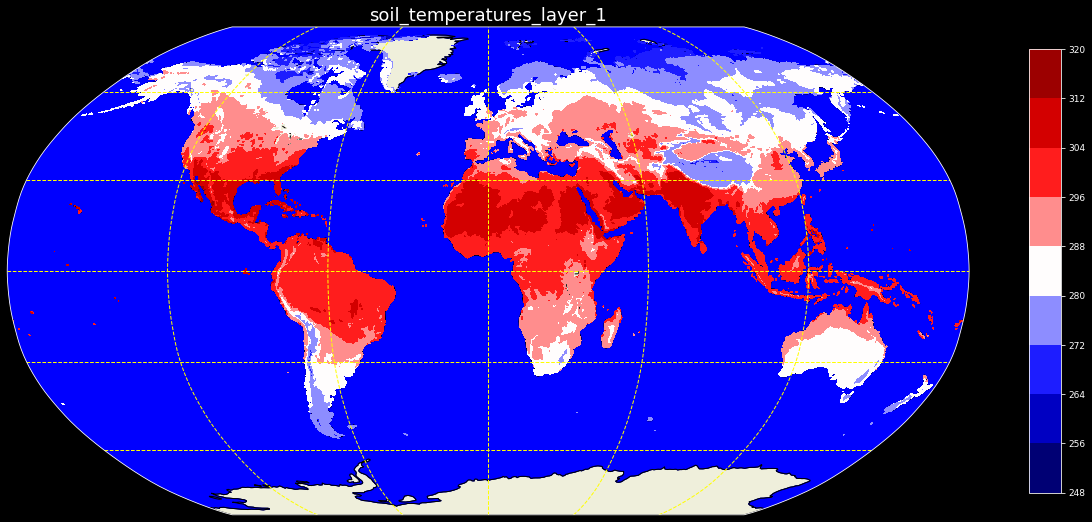

In [48]:
MAPFORMAT(LAT2019,
          LON2019,
          L12019,
          nc2019.variables["tsoil1"],
          "c")._GET_MAP()

> 2020

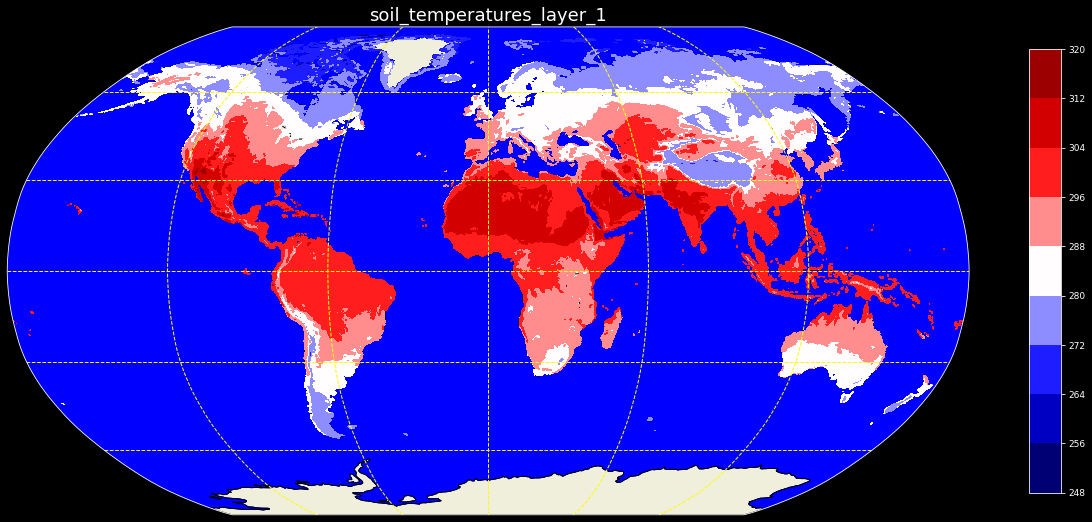

In [49]:
MAPFORMAT(LAT2020,
          LON2020,
          L12020,
          nc2020.variables["tsoil1"],
          "c")._GET_MAP()

> 2021

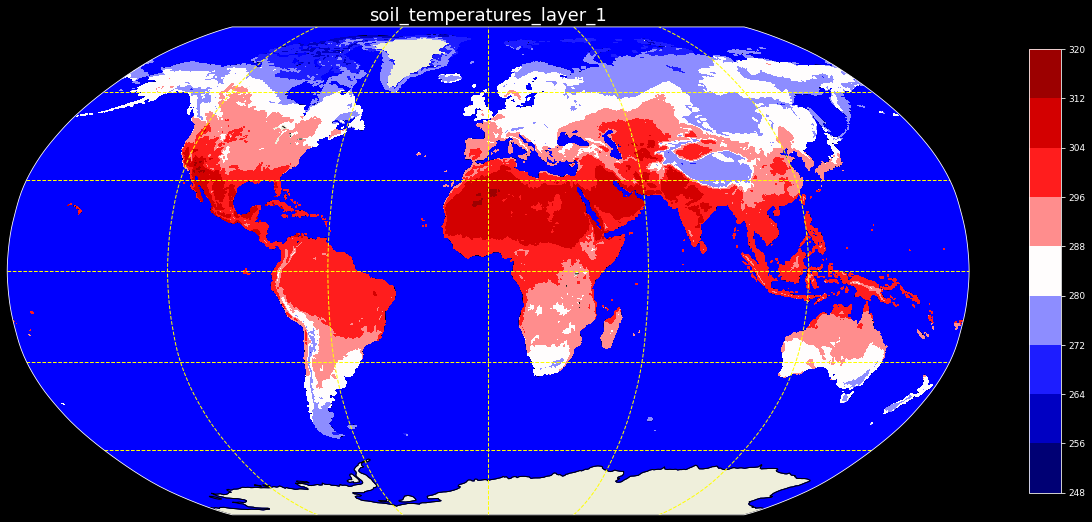

In [50]:
MAPFORMAT(LAT2021,
          LON2021,
          L12021,
          nc2021.variables["tsoil1"],
          "c")._GET_MAP()

> 2022

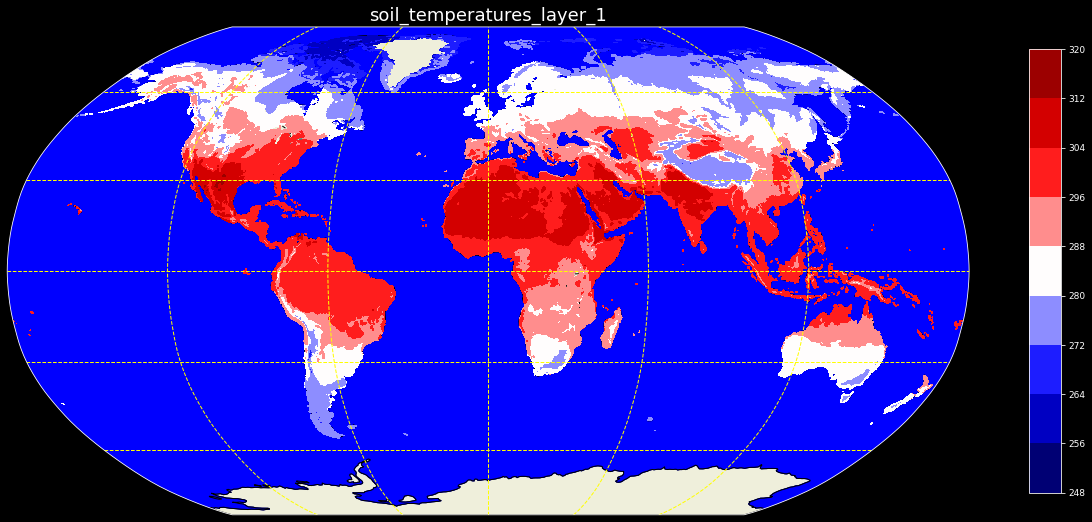

In [51]:
MAPFORMAT(LAT2022,
          LON2022,
          L12022,
          nc2022.variables["tsoil1"],
          "c")._GET_MAP()

- LAYER II

> 2018

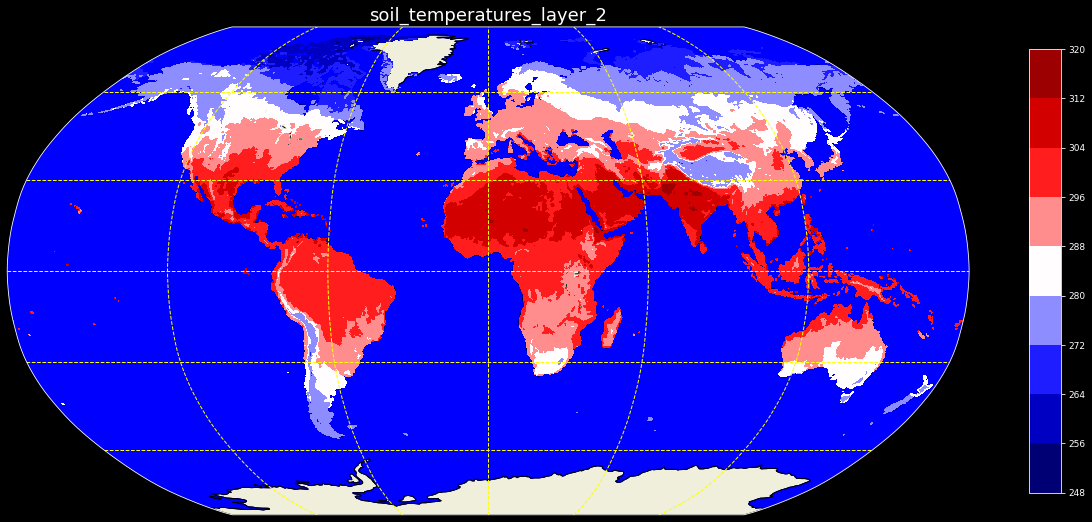

In [45]:
MAPFORMAT(LAT2018,
          LON2018,
          L22018,
          nc2018.variables["tsoil2"],
          "c")._GET_MAP()

> 2019

In [52]:
MAPFORMAT(LAT2019,
          LON2019,
          L22019,
          nc2019.variables["tsoil2"],
          "c")._GET_MAP()

> 2020

In [53]:
MAPFORMAT(LAT2020,
          LON2020,
          L22020,
          nc2020.variables["tsoil2"],
          "c")._GET_MAP()

> 2021

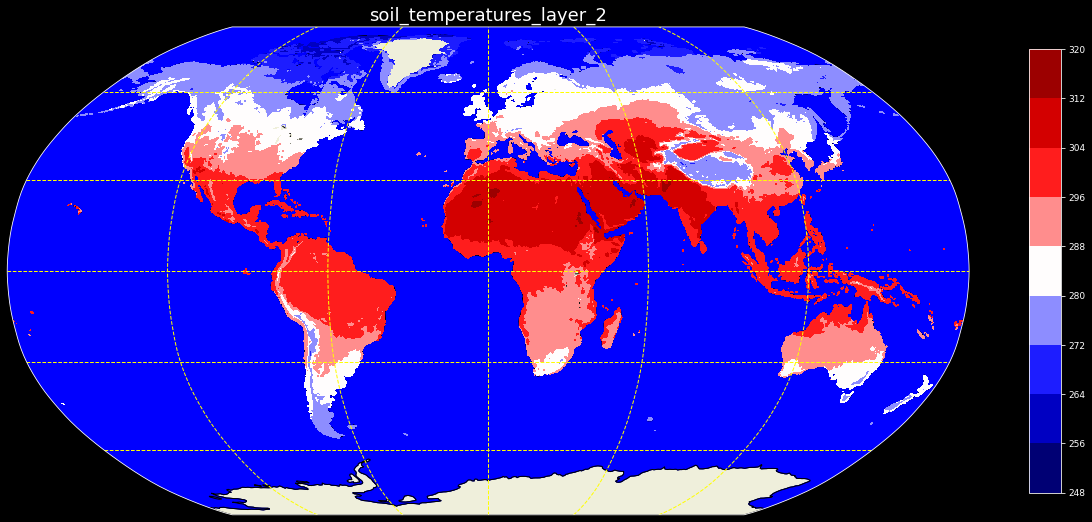

In [54]:
MAPFORMAT(LAT2021,
          LON2021,
          L22021,
          nc2021.variables["tsoil2"],
          "c")._GET_MAP()

> 2022

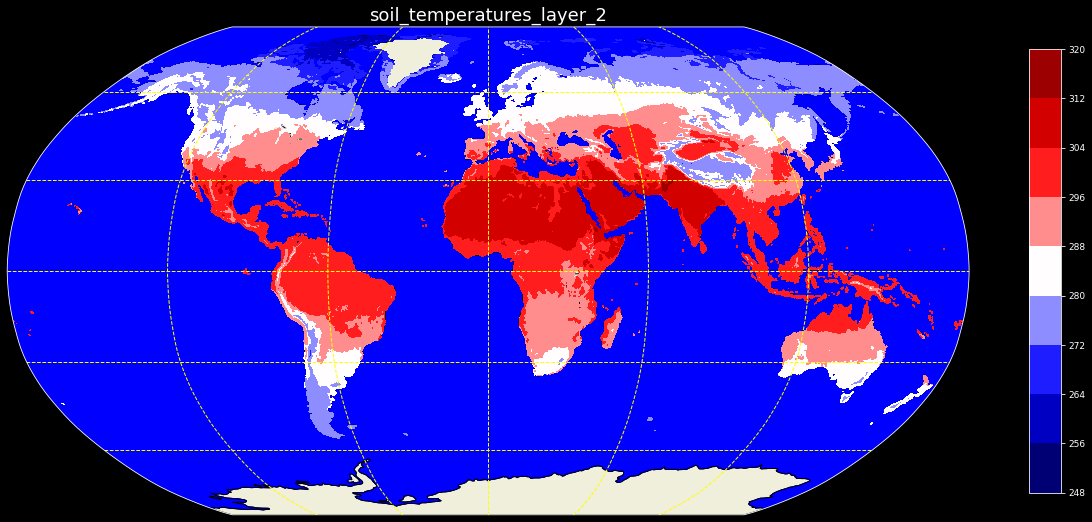

In [55]:
MAPFORMAT(LAT2022,
          LON2022,
          L22022,
          nc2022.variables["tsoil2"],
          "c")._GET_MAP()

- LAYER III

> 2018

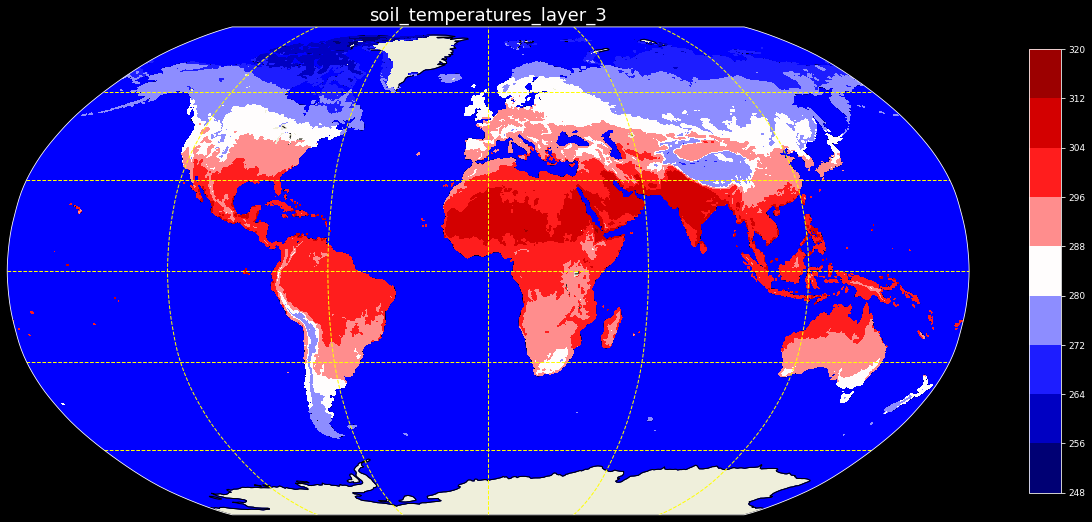

In [46]:
MAPFORMAT(LAT2018,
          LON2018,
          L32018,
          nc2018.variables["tsoil3"],
          "c")._GET_MAP()

> 2019

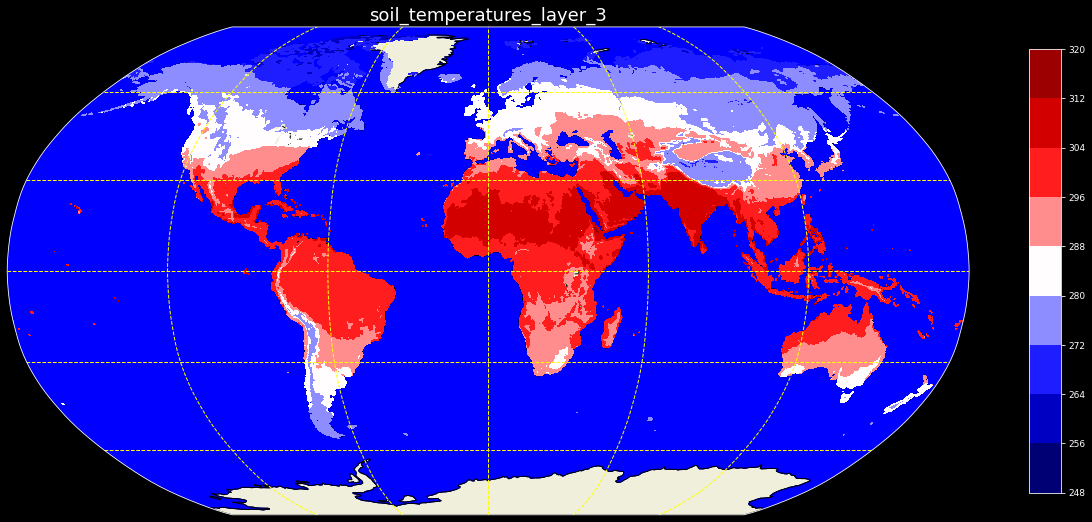

In [56]:
MAPFORMAT(LAT2019,
          LON2019,
          L32019,
          nc2019.variables["tsoil3"],
          "c")._GET_MAP()

> 2020

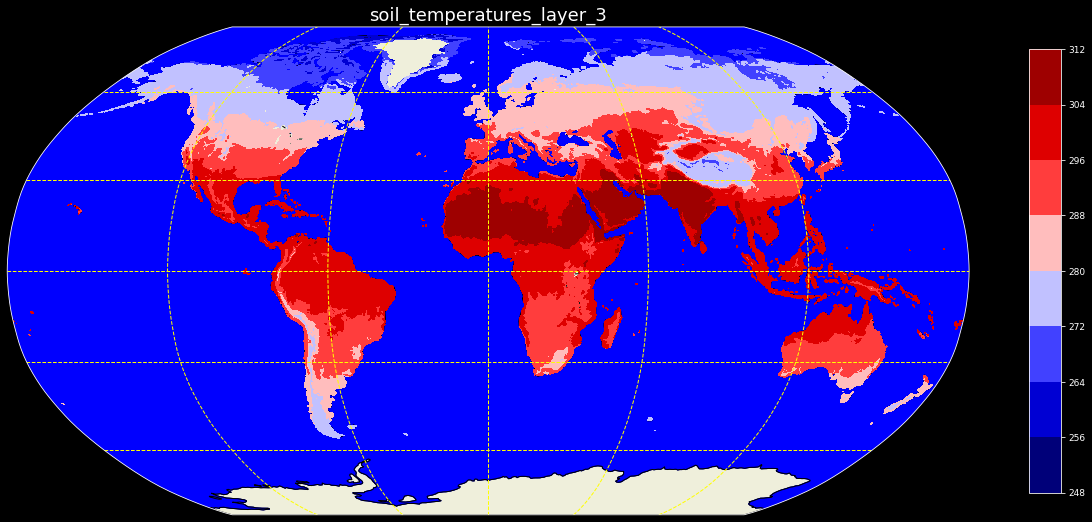

In [57]:
MAPFORMAT(LAT2020,
          LON2020,
          L32020,
          nc2020.variables["tsoil3"],
          "c")._GET_MAP()

> 2021

In [58]:
MAPFORMAT(LAT2021,
          LON2021,
          L32021,
          nc2021.variables["tsoil3"],
          "c")._GET_MAP()

> 2022

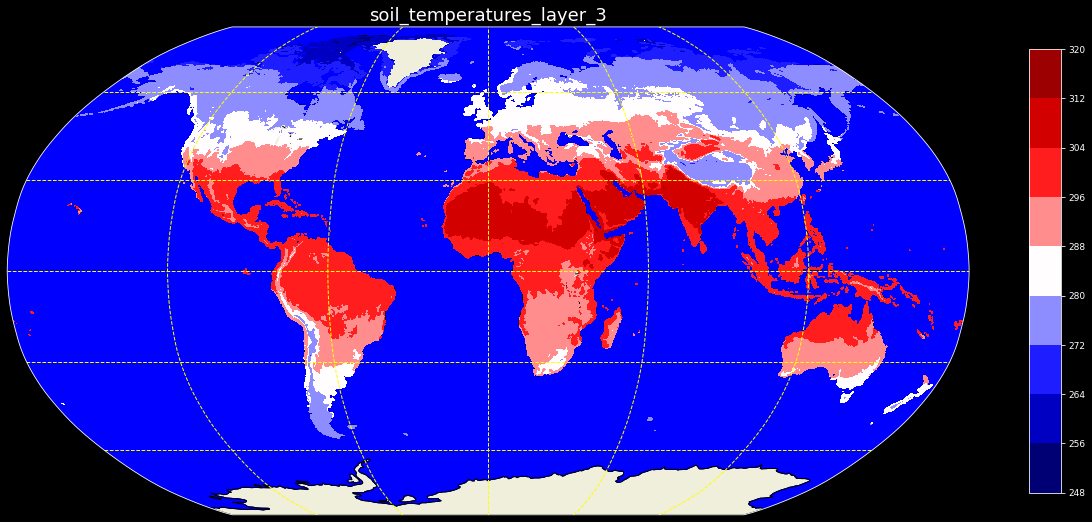

In [59]:
MAPFORMAT(LAT2022,
          LON2022,
          L32022,
          nc2022.variables["tsoil3"],
          "c")._GET_MAP()

- LAYER IV

> 2018

In [47]:
MAPFORMAT(LAT2018,
          LON2018,
          L42018,
          nc2018.variables["tsoil4"],
          "c")._GET_MAP()

> 2019

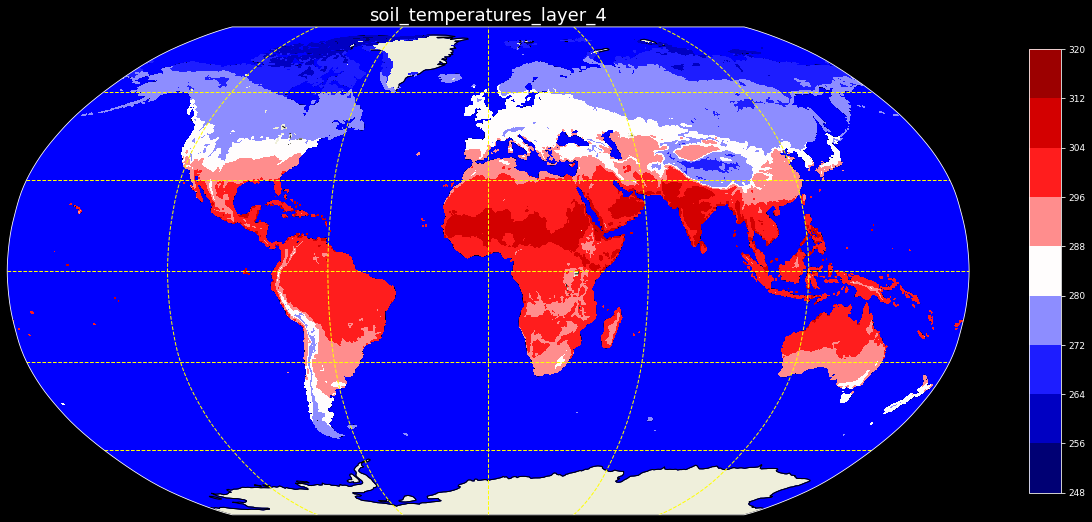

In [60]:
MAPFORMAT(LAT2019,
          LON2019,
          L42019,
          nc2019.variables["tsoil4"],
          "c")._GET_MAP()

> 2020

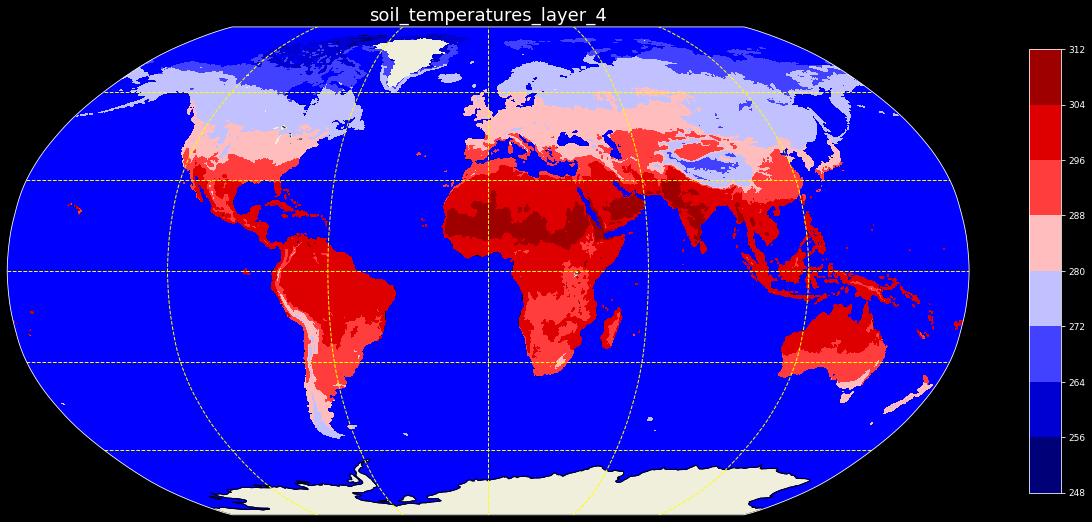

In [61]:
MAPFORMAT(LAT2020,
          LON2020,
          L42020,
          nc2020.variables["tsoil4"],
          "c")._GET_MAP()

> 2021

In [62]:
MAPFORMAT(LAT2021,
          LON2021,
          L42021,
          nc2021.variables["tsoil4"],
          "c")._GET_MAP()

> 2022

In [63]:
MAPFORMAT(LAT2022,
          LON2022,
          L42022,
          nc2022.variables["tsoil4"],
          "c")._GET_MAP()

## CONCLUSION MAP - MULTI 2

> 2018 AND 2022

#### LAYER I

In [104]:
MAPMULTITWO(LAT2018,
             LON2018,
             L12018,
             "2018",
             LAT2022,
             LON2022,
             L12022,
             "2022",
             "c")._GET_MAP()

#### LAYER II

In [105]:
MAPMULTITWO(LAT2018,
             LON2018,
             L22018,
             "2018",
             LAT2022,
             LON2022,
             L22022,
             "2022",
             "c")._GET_MAP()

#### LAYER III

In [106]:
MAPMULTITWO(LAT2018,
             LON2018,
             L32018,
             "2018",
             LAT2022,
             LON2022,
             L32022,
             "2022",
             "c")._GET_MAP()

#### LAYER IV

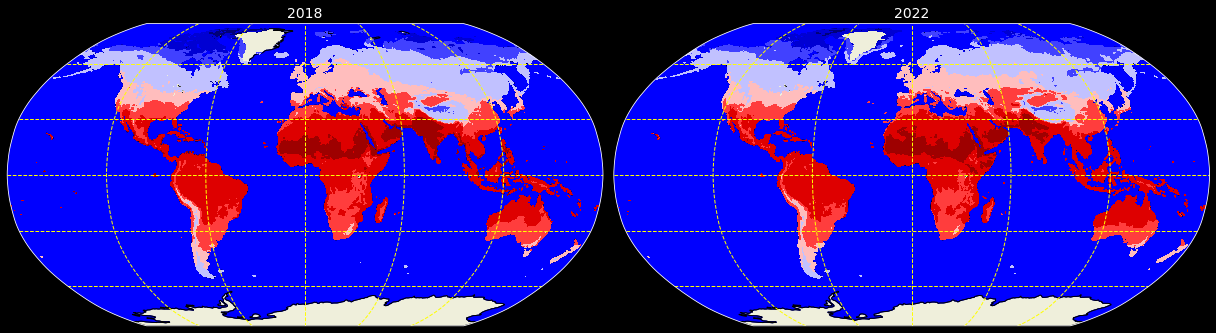

In [107]:
MAPMULTITWO(LAT2018,
             LON2018,
             L42018,
             "2018",
             LAT2022,
             LON2022,
             L42022,
             "2022",
             "c")._GET_MAP()

## CONCLUSION MAP - MULTI 4

> FROM 2019 TO 2022

#### LAYER I

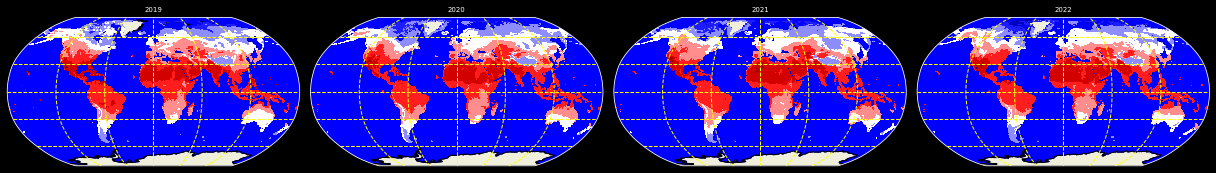

In [92]:
MAPMULTIFOUR(LAT2019,
             LON2019,
             L12019,
             "2019",
             LAT2020,
             LON2020,
             L12020,
             "2020",
             LAT2021,
             LON2021,
             L12021,
             "2021",
             LAT2022,
             LON2022,
             L12022,
             "2022",
             "c")._GET_MAP()

#### LAYER II

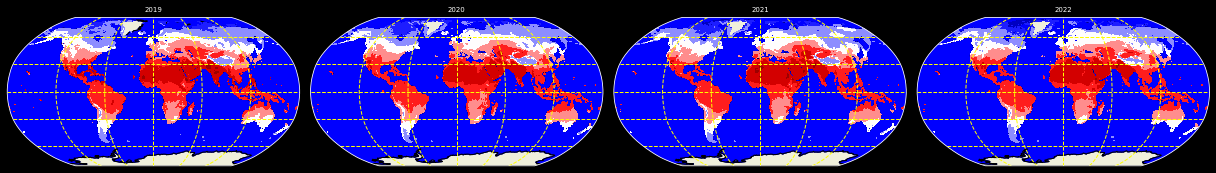

In [91]:
MAPMULTIFOUR(LAT2019,
             LON2019,
             L22019,
             "2019",
             LAT2020,
             LON2020,
             L22020,
             "2020",
             LAT2021,
             LON2021,
             L22021,
             "2021",
             LAT2022,
             LON2022,
             L22022,
             "2022",
             "c")._GET_MAP()

#### LAYER III

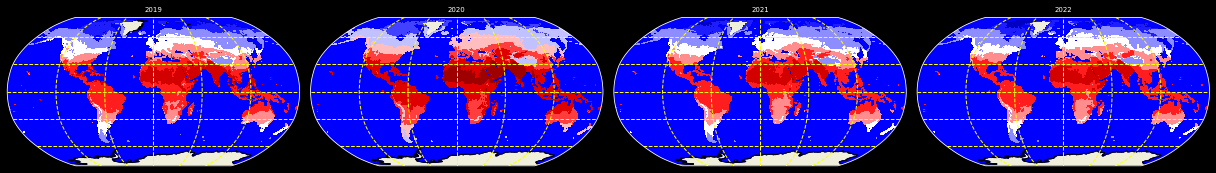

In [90]:
MAPMULTIFOUR(LAT2019,
             LON2019,
             L32019,
             "2019",
             LAT2020,
             LON2020,
             L32020,
             "2020",
             LAT2021,
             LON2021,
             L32021,
             "2021",
             LAT2022,
             LON2022,
             L32022,
             "2022",
             "c")._GET_MAP()

#### LAYER IV

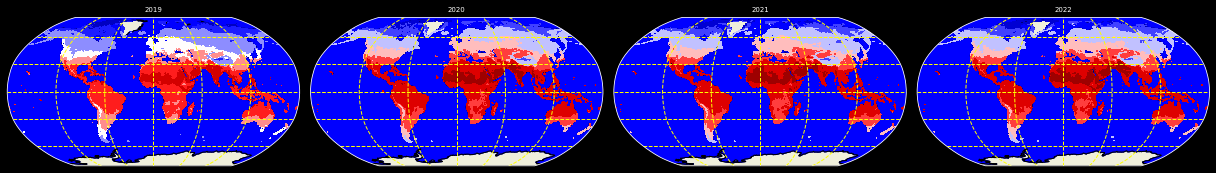

In [89]:
MAPMULTIFOUR(LAT2019,
             LON2019,
             L42019,
             "2019",
             LAT2020,
             LON2020,
             L42020,
             "2020",
             LAT2021,
             LON2021,
             L42021,
             "2021",
             LAT2022,
             LON2022,
             L42022,
             "2022",
             "c")._GET_MAP()